<a href="https://colab.research.google.com/github/Snehalnasare/ML_lab/blob/main/Pract5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
"""ML-LAB-5.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/10OGHGYgTsifURl49T8g3G_NY2mg9cVpM
"""

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import graphviz

digits = datasets.load_breast_cancer()
print('Dataset structure= ', dir(digits))

df = pd.DataFrame(digits.data, columns = digits.feature_names)
df['target'] = digits.target
df['feature_names'] = df.target.apply(lambda x : digits.target_names[x]) 


Dataset structure=  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [49]:
print('Unique target values=',df['target'].unique())

Unique target values= [0 1]


In [50]:
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,feature_names
433,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.1594,0.08744,0.1943,0.06132,...,145.30,1603.0,0.1390,0.34630,0.3912,0.17080,0.3007,0.08314,0,malignant
174,10.66,15.15,67.49,349.6,0.08792,0.04302,0.0000,0.00000,0.1928,0.05975,...,73.20,408.3,0.1076,0.06791,0.0000,0.00000,0.2710,0.06164,1,benign
42,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.2107,0.09961,0.2310,0.06343,...,177.40,1651.0,0.1247,0.74440,0.7242,0.24930,0.4670,0.10380,0,malignant
519,12.75,16.70,82.51,493.8,0.11250,0.11170,0.0388,0.02995,0.2120,0.06623,...,93.63,624.1,0.1475,0.19790,0.1423,0.08045,0.3071,0.08557,1,benign
339,23.51,24.27,155.10,1747.0,0.10690,0.12830,0.2308,0.14100,0.1797,0.05506,...,202.40,2906.0,0.1515,0.26780,0.4819,0.20890,0.2593,0.07738,0,malignant


In [53]:
df[df.target == 0].head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,feature_names
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant


In [55]:
df[df.target == 1].head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,feature_names
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259,1,benign
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183,1,benign
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,1,benign


In [57]:
X = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area']]
y = df[['target']]
print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (569, 4)
y shape= (569, 1)


In [58]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (455, 4)
X_test dimension=  (114, 4)
y_train dimension=  (455, 1)
y_train dimension=  (114, 1)


In [59]:
cls = tree.DecisionTreeClassifier(random_state= 1)
cls.fit(X_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [60]:
print('Actual value of pixel for 10th training example=',digits.target_names[y_test.iloc[10]][0])
print('Predicted value of pixel for 10th training example=', digits.target_names[cls.predict([X_test.iloc[10]])][0])

Actual value of pixel for 10th training example= benign
Predicted value of pixel for 10th training example= benign


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [63]:
cls.score(X_test, y_test)

0.868421052631579

[Text(0.6482843137254902, 0.9444444444444444, 'X[2] <= 98.755\ngini = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(0.375, 0.8333333333333334, 'X[2] <= 89.995\ngini = 0.213\nsamples = 314\nvalue = [38, 276]'),
 Text(0.17647058823529413, 0.7222222222222222, 'X[2] <= 85.25\ngini = 0.108\nsamples = 263\nvalue = [15, 248]'),
 Text(0.0784313725490196, 0.6111111111111112, 'X[1] <= 23.465\ngini = 0.046\nsamples = 214\nvalue = [5, 209]'),
 Text(0.0392156862745098, 0.5, 'X[2] <= 73.29\ngini = 0.031\nsamples = 191\nvalue = [3, 188]'),
 Text(0.0196078431372549, 0.3888888888888889, 'gini = 0.0\nsamples = 84\nvalue = [0, 84]'),
 Text(0.058823529411764705, 0.3888888888888889, 'X[3] <= 376.8\ngini = 0.055\nsamples = 107\nvalue = [3, 104]'),
 Text(0.0392156862745098, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0784313725490196, 0.2777777777777778, 'X[0] <= 11.805\ngini = 0.037\nsamples = 106\nvalue = [2, 104]'),
 Text(0.058823529411764705, 0.16666666666666666, 'X[3] <= 

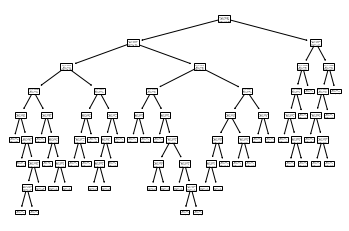

In [64]:
tree.plot_tree(cls)

In [65]:
dot_data = tree.export_graphviz(cls, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("breast_cancer_decision_tree")

'breast_cancer_decision_tree.pdf'

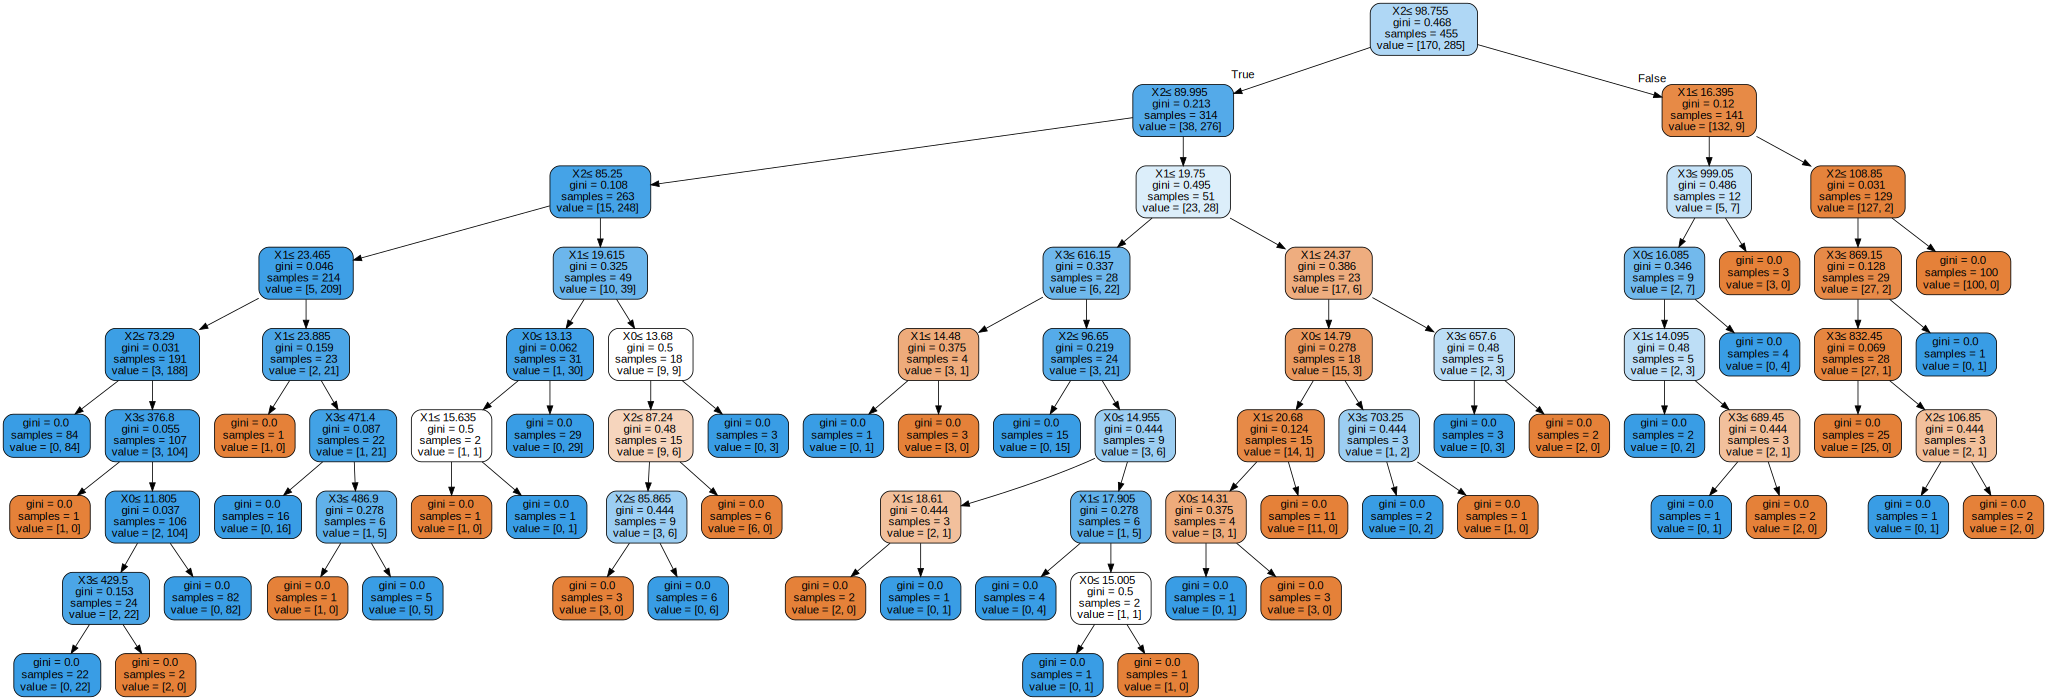

In [70]:
dot_data = tree.export_graphviz(cls, out_file=None,filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)   
graph